In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

2022-11-07 21:43:49.971736: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('datasets/GoogleStockPrices.csv')
data = data.dropna()
train, test = train_test_split(data, test_size=0.1, shuffle=False)
train.shape, test.shape

((3866, 8), (430, 8))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4296 non-null   object 
 1   Open          4296 non-null   float64
 2   High          4296 non-null   float64
 3   Low           4296 non-null   float64
 4   Close         4296 non-null   float64
 5   Volume        4296 non-null   int64  
 6   Dividends     4296 non-null   int64  
 7   Stock Splits  4296 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 268.6+ KB


In [5]:
trainData = train.iloc[:,4:5].values
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3866, 1)

In [6]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [8]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [9]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - loss: 0.0024 - 9s/epoch - 262ms/step
Epoch 2/20
35/35 - 4s - loss: 3.4915e-04 - 4s/epoch - 123ms/step
Epoch 3/20
35/35 - 4s - loss: 2.6795e-04 - 4s/epoch - 128ms/step
Epoch 4/20
35/35 - 4s - loss: 2.2619e-04 - 4s/epoch - 123ms/step
Epoch 5/20
35/35 - 4s - loss: 2.6703e-04 - 4s/epoch - 122ms/step
Epoch 6/20
35/35 - 4s - loss: 2.2069e-04 - 4s/epoch - 128ms/step
Epoch 7/20
35/35 - 4s - loss: 1.8483e-04 - 4s/epoch - 128ms/step
Epoch 8/20
35/35 - 4s - loss: 1.8329e-04 - 4s/epoch - 125ms/step
Epoch 9/20
35/35 - 4s - loss: 2.5467e-04 - 4s/epoch - 123ms/step
Epoch 10/20
35/35 - 5s - loss: 1.7923e-04 - 5s/epoch - 132ms/step
Epoch 11/20
35/35 - 4s - loss: 3.9225e-04 - 4s/epoch - 126ms/step
Epoch 12/20
35/35 - 4s - loss: 1.6306e-04 - 4s/epoch - 125ms/step
Epoch 13/20
35/35 - 4s - loss: 1.6635e-04 - 4s/epoch - 125ms/step
Epoch 14/20
35/35 - 4s - loss: 1.3539e-04 - 4s/epoch - 125ms/step
Epoch 15/20
35/35 - 5s - loss: 1.4841e-04 - 5s/epoch - 154ms/step
Epoch 16/20
35/35 - 5s 

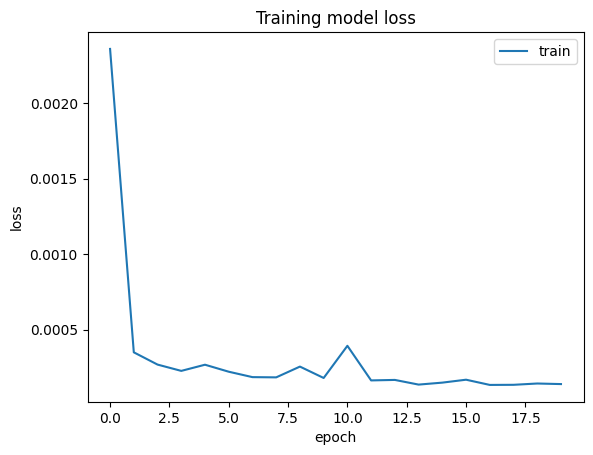

In [10]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [11]:
testData = test
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(370, 60, 1)

In [12]:
y_pred = model.predict(X_test)
y_pred.shape

12/12 [==============================] - 1s 35ms/step


(370, 1)

In [13]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price

array([[ 989.979  ],
       [ 979.4065 ],
       [ 973.57513],
       [ 972.2766 ],
       [ 975.18097],
       [ 981.8169 ],
       [ 990.53314],
       [ 999.839  ],
       [1008.2175 ],
       [1015.91644],
       [1023.4587 ],
       [1031.5322 ],
       [1040.4387 ],
       [1050.0997 ],
       [1060.8933 ],
       [1072.7421 ],
       [1085.1775 ],
       [1097.804  ],
       [1109.8615 ],
       [1119.9087 ],
       [1127.4899 ],
       [1132.7822 ],
       [1136.2578 ],
       [1138.3236 ],
       [1138.7806 ],
       [1139.0242 ],
       [1140.3816 ],
       [1143.1819 ],
       [1147.2861 ],
       [1152.6261 ],
       [1158.8824 ],
       [1165.9169 ],
       [1173.6738 ],
       [1182.1912 ],
       [1190.8854 ],
       [1198.6885 ],
       [1204.8416 ],
       [1209.1744 ],
       [1211.9746 ],
       [1213.4862 ],
       [1214.4397 ],
       [1215.4094 ],
       [1216.8075 ],
       [1218.8936 ],
       [1221.6698 ],
       [1224.9231 ],
       [1228.5569 ],
       [1232.

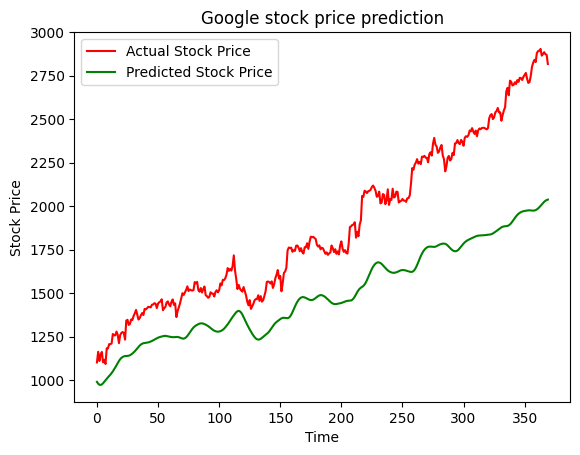

In [14]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
model.save('googleModel.hdf5')

In [16]:
import tensorflow as tf
model = tf.keras.models.load_model('google_model.hdf5')

In [20]:
last60 = data['Close'][-61:-1].values
last60 = last60.reshape((1, 60, 1))
last60.shape

(1, 60, 1)

In [21]:
predicted = model.predict(last60)
predicted = sc.inverse_transform(predicted)[0, 0]
predicted

1/1 [==============================] - 0s 30ms/step


2943.3027

In [23]:
data['Close'][-1:]

4295    2817.52002
Name: Close, dtype: float64